# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Muhammad Syahnabil Hammam Sungkar]
- **Email:** [muhammad.syahnabil.hammam-2021@ftmm.unair.ac.id]
- **ID Dicoding:** [devhammy]

## Menentukan Pertanyaan Bisnis

- Bagaimana trend penyewaan sepeda di setiap bulan?
- Pada Jam berapa puncak penyewaan sepeda terjadi? 
- Apa pengaruh musim terhadap tingkat ketersewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Data Wrangling

### Gathering Data

In [9]:
# Read data readme file
dir = r"C:\Hammy\Kuliah\10. Semester 6\MSIB\Data"
with open(os.path.join(dir, "Readme.txt"), 'r') as f:
    print(f.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [11]:
data_day = pd.read_csv(os.path.join(dir, 'day.csv'))
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
data_hour = pd.read_csv(os.path.join(dir, 'hour.csv'))
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Check Missing Value

In [13]:
print("Jumlah Missing Value pada day dataset: ", data_day.isna().sum().any())
print("Jumlah Missing Value pada hour dataset: ", data_hour.isna().sum().any())

Jumlah Missing Value day dataset:  False
Jumlah Missing Value hour dataset:  False


##### Check Duplicated Value

In [14]:
print("Jumlah data duplikat pada day dataset: ", data_day.isna().sum().any())
print("Jumlah data duplikat pada hour dataset: ", data_hour.isna().sum().any())

Jumlah data duplikat pada day dataset:  False
Jumlah data duplikat pada hour dataset:  False


##### Check Dtype

In [15]:
print(data_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [16]:
print(data_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


### Cleaning Data

Dataset sudah clean dikarenakan:

- Tidak terdapat missing value yang berarti tidak perlu melakukan drop atau impute.
- Berdasarkan method **info()**, data ditemukan seluruh Dtype sesuai sesuai dengan jenis/tipe datanya, artinya kita tidak perlu convert apapun.
- Tidak terdapat data duplikat, artinya kita tidak perlu drop_duplicates().

## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik dari Data

In [17]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Menggabungkan dua dataset berdasarkan kolom "dteday" 

In [19]:
def merge_df(data_day, data_hour):
  data_day = data_day.copy()
  data_hour = data_hour.copy()

  day_feature = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
  day_feature_dict = {x:f"{x}_day" for x in day_feature}
  data_day.rename(columns=day_feature_dict, inplace=True)

  drop_measure = [x for x in data_day.columns if x not in day_feature_dict.values()]
  drop_measure.remove('dteday')
  data_day.drop(drop_measure, axis=1, inplace=True)

  data_merge = pd.DataFrame(data_hour.merge(data_day, on="dteday", how="left"))

  return data_merge

In [21]:
data_merge = merge_df(data_day, data_hour)
data_merge.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3,13,16,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,8,32,40,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,5,27,32,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3,10,13,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985


In [22]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         17379 non-null  int64  
 1   dteday          17379 non-null  object 
 2   season          17379 non-null  int64  
 3   yr              17379 non-null  int64  
 4   mnth            17379 non-null  int64  
 5   hr              17379 non-null  int64  
 6   holiday         17379 non-null  int64  
 7   weekday         17379 non-null  int64  
 8   workingday      17379 non-null  int64  
 9   weathersit      17379 non-null  int64  
 10  temp            17379 non-null  float64
 11  atemp           17379 non-null  float64
 12  hum             17379 non-null  float64
 13  windspeed       17379 non-null  float64
 14  casual          17379 non-null  int64  
 15  registered      17379 non-null  int64  
 16  cnt             17379 non-null  int64  
 17  temp_day        17379 non-null 

In [25]:
data_merge.to_csv(r"../Dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend penyewaan sepeda di setiap bulan?

In [27]:
to_month = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

to_year = {
    0: 2011,
    1: 2012
}

def plot_by_month(df: pd.DataFrame, feature='cnt', return_df=False):
    df = df.copy()
    df.sort_values(['yr', 'mnth'], inplace=True)
    df['month'] = df['mnth'].apply(lambda x: to_month[x])
    df['year'] = df['yr'].apply(lambda x: str(to_year[x]))
    df['month_year'] = df['month'] + " " + df['year']

    df_feature_col = df.groupby('month_year').mean(numeric_only=True)[feature]
    df[f'month_{feature}'] = df['month_year'].apply(lambda x: df_feature_col[x])
    df_result = df[['month_year', f'month_{feature}']].set_index('month_year')

    if return_df:
        return df_result

    plt.figure(figsize=(8, 5))
    sns.barplot(x=f'month_{feature}', y='month_year', data=df_result, orient='h')
    plt.title(f'Monthly Trend of Bike Rents by {feature}')
    plt.show()


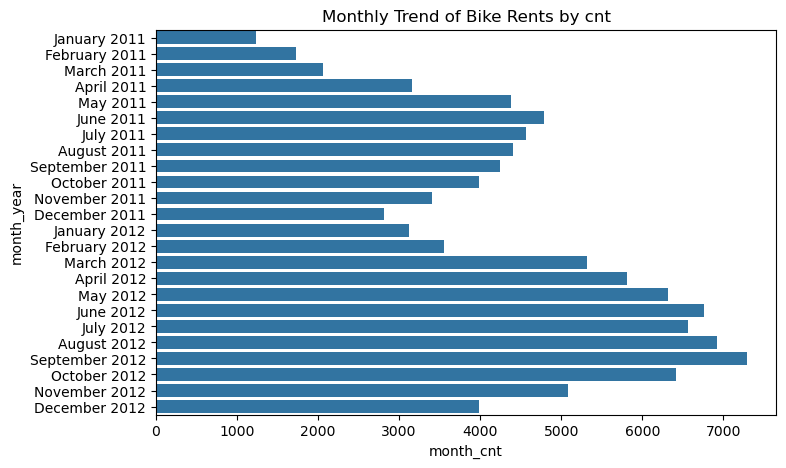

In [28]:
plot_by_month(data_day, 'cnt')

### Pertanyaan 2: Pada Jam berapa puncak penyewaan sepeda terjadi?

In [29]:
hr_format = {
    0: '12 am', 1: '1 am', 2: '2 am', 3: '3 am',
    4: '4 am', 5: '5 am', 6: '6 am', 7: '7 am',
    8: '8 am', 9: '9 am', 10: '10 am', 11: '11 am',
    12: '12 pm', 13: '1 pm', 14: '2 pm', 15: '3 pm',
    16: '4 pm', 17: '5 pm', 18: '6 pm', 19: '7 pm',
    20: '8 pm', 21: '9 pm', 22: '10 pm', 23: '11 pm'
}

def plot_by_hour(data: pd.DataFrame, col='cnt'):
    data = data.copy()
    data_hr_col = data.groupby('hr').mean(numeric_only=True)[col]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=data_hr_col.index.map(hr_format), y=data_hr_col)
    plt.title(f'Hourly Trend of {col.capitalize()}')
    plt.xlabel('Hour of the Day')
    plt.ylabel(col.capitalize())
    plt.show()

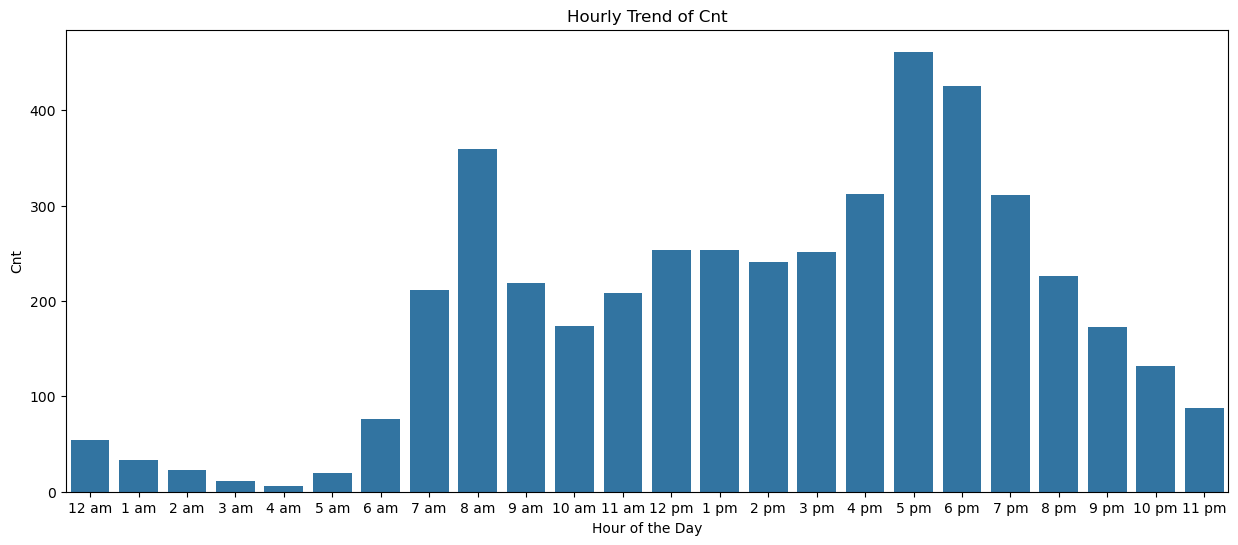

In [30]:
plot_by_hour(data_merge)

### Pertanyaan 3: Apa pengaruh musim terhadap tingkat penyewaan sepeda?

In [31]:
season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

def plot_by_season(data: pd.DataFrame, col='cnt'):
    data = data.copy()
    data_season_col = data.groupby('season').mean(numeric_only=True)[col]

    plt.figure(figsize=(5, 5))
    plt.pie(data_season_col, labels=data_season_col.index.map(season), autopct='%1.1f%%', startangle=140)
    plt.title('Penyewaan Sepeda Berdasarkan Musim')
    plt.show()

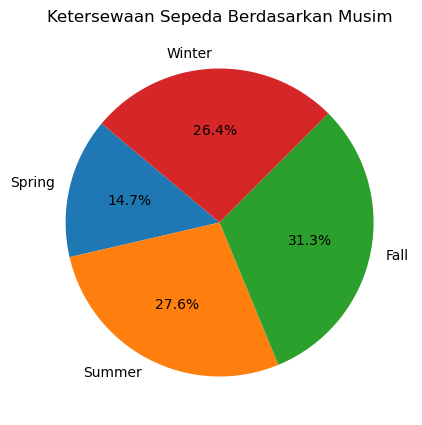

In [32]:
plot_by_season(data_merge)

## Conclusion

- Conclution pertanyaan 1: Trend peminjaman selalu menurun di bulan Desember dan Januari setiap tahunnya. Selain itu, jika dilihat berdasarkan tahun, tingkat ketersewaan di tahun 2012 lebih tinggi dari tahun sebelumnya.
- Conclution pertanyaan 2: Trend penyewaan speda mencapai puncak pada sore hingga awal malam hari di jam 4-7 pm
- Conclution pertanyaan 3: Musim yang paling banyak penyewaan sepeda adalah musim gugur, sedangkan paling sedikit di musim semi.